In [49]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [50]:
stocks = ['IBM', '^GSPC']
start_date = '2010-01-01'
end_date = '2017-01-01'

In [84]:
# market interest rate
RISK_FREE_RATE = 0.05
# we will consider monthly returns - and we want to calculate the annual return
MONTHS_IN_YEAR = 12

In [51]:
# define a method/function to download data from yahoo finance
def download_data():
    data = {}
    ticker = yf.download(stocks, start_date, end_date)['Adj Close']
    return ticker

In [52]:
stock_data = download_data()

[*********************100%***********************]  2 of 2 completed


In [53]:
stock_data = stock_data.resample('M').last()

In [54]:
stock_data.head()

,IBM,^GSPC
Date,,
2010-01-31,76.034500,1073.869995
2010-02-28,79.351158,1104.489990
2010-03-31,80.031349,1169.430054
2010-04-30,80.499374,1186.689941
2010-05-31,78.566177,1089.410034


In [55]:
stock_data = stock_data.rename(columns={'IBM' : 's_adjclose', '^GSPC' : 'm_adjclose'})

In [58]:
stock_data.head()

,s_adjclose,m_adjclose
Date,,
2010-01-31,76.034500,1073.869995
2010-02-28,79.351158,1104.489990
2010-03-31,80.031349,1169.430054
2010-04-30,80.499374,1186.689941
2010-05-31,78.566177,1089.410034


In [59]:
stock_data.shift(1)

,s_adjclose,m_adjclose
Date,,
2010-01-31,NaN,NaN
2010-02-28,76.034500,1073.869995
2010-03-31,79.351158,1104.489990
2010-04-30,80.031349,1169.430054
2010-05-31,80.499374,1186.689941
...,...,...
2016-08-31,115.646942,2173.600098
2016-09-30,115.382133,2170.949951
2016-10-31,115.360313,2168.270020


In [60]:
# log returns
log_returns = np.log(stock_data/stock_data.shift(1))
log_returns = log_returns[1:]

In [70]:
log_returns = log_returns.rename(columns={'s_adjclose' : 's_returns', 'm_adjclose' : 'm_returns'})

In [72]:
# covariance matrix
cov_matrix = log_returns.cov() # this returns a dataframe
# we need to convert it to a matrix
cov_matrix = cov_matrix.to_numpy()

In [73]:
cov_matrix


array([[0.00230049, 0.00093754],
       [0.00093754, 0.00131399]])

In [74]:
# beta from formula 
beta = cov_matrix[0,1]/cov_matrix[1,1]

In [83]:
# using linear regression to fit a line to the data
# [stock_returns, market_returns] - slope is the beta
# beta from regression
beta1, alpha = np.polyfit(log_returns['m_returns'], log_returns['s_returns'], deg=1)

In [86]:
log_returns.head()

,s_returns,m_returns
Date,,
2010-02-28,0.042696,0.028115
2010-03-31,0.008535,0.057133
2010-04-30,0.005831,0.014651
2010-05-31,-0.024308,-0.085532
2010-06-30,-0.014312,-0.055388


In [88]:
# calculate the expected return according to the CAPM formula
# we are after annual return (this is why multiply by 12)
Expected_return = RISK_FREE_RATE + beta1*(log_returns['m_returns'].mean()*12 - RISK_FREE_RATE)

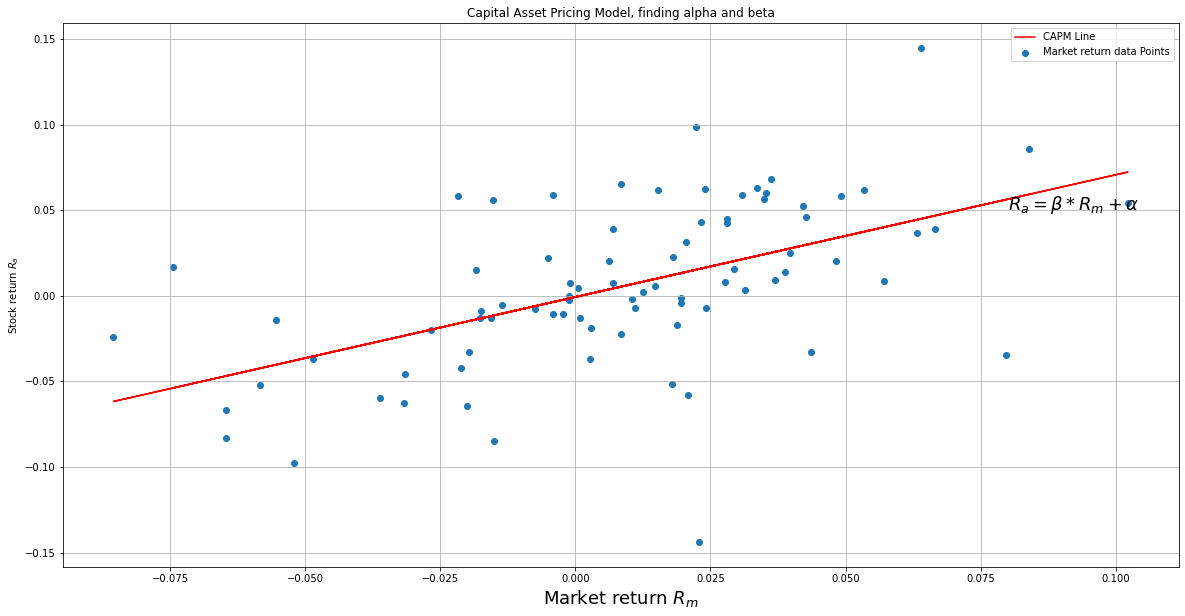

In [91]:
fig, axis = plt.subplots(1, figsize=(20, 10))
axis.scatter(log_returns["m_returns"], log_returns['s_returns'], label="Market return data Points")
axis.plot(log_returns["m_returns"], beta1 * log_returns["m_returns"] + alpha, color='red', label="CAPM Line")
plt.title('Capital Asset Pricing Model, finding alpha and beta')
plt.xlabel('Market return $R_m$', fontsize=18)
plt.ylabel('Stock return $R_a$')
plt.text(0.08, 0.05, r'$R_a = \beta * R_m + \alpha$', fontsize=18)
plt.legend()
plt.grid(True)
plt.show()